W projekcie będę pracował na zbiorze: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing.

Plan pracy:
    Proces przetwarzania danych.
    Proces modelowania (znajdowania optymalnych parametrów).
    Porównanie modeli.
    Wizualizacja wyników.
    Podsumowanie pracy


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Wczytywanie danych

In [86]:
data = pd.read_csv('Data/bank-additional-full.csv', delimiter=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Przetwarzanie danych

Zmienne w naszych danych:
# Informacje z banku o kliencie:
1 - age (numeric)
2 - job : rodzaj pracy (kategorie: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - martial : status małżeński (kategorie: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education : (kategorie: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: kredyt mieszkaniowy? (categorical: 'no','yes','unknown')
7 - loan: czy posiada pożyczki? (categorical: 'no','yes','unknown')
# Informacje powiązane z ostatnim kontaktem:
8 - contact: rodzaj kontaktu (categorical: 'cellular','telephone')
9 - month: miesiąc ostatniego kontaktu (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: dzień ostatniego kontaktu (categorical: 'mon','tue','wed','thu','fri')
11 - duration: czas trwania ostatniego kontaktu, w sekundach (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: liczba kontaktów z danym klientem w trakcie trwania kampanii (numeric, includes last contact)
13 - pdays: liczba dni która upłynęła od ostatniego dnia kontaktu z klientem w trakcie kampanii (numeric; 999 means client was not previously contacted)
14 - previous: liczba kontaktów z danym klientem przed kampanią (numeric)
15 - poutcome: wynik poprzedniej kampanii marketingowej (categorical: 'failure','nonexistent','success')
# Socjoeknomiczne atrybuty
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Wynik (desired target):
21 - y - Czy klient założył lokatę terminową? (binary: 'yes','no')

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Jak widać, mamy wartości tekstowe. Przerobimy je na numeryczne.

In [88]:
for key in data:
    print(data[key].value_counts(), "" , sep="\n")

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

no         33950


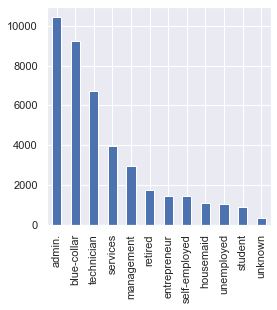

In [89]:
data["job"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data = data[data.job != "unknown"]

jobs = { 'entrepreneur':16,
        'management':12,
        'technician':10,
        'blue-collar':7,
        'admin.':5,
        'services':4,
        'self-employed':6,
        'housemaid':3,
        'retired':2,
        'student':1,
        'unemployed':-1,
         }

data.job = data.job.map(jobs);

Zamieńmy wartości no/yes na numeryczne 0/1

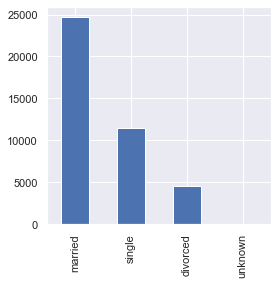

In [90]:
data["marital"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data = data[data.marital != "unknown"]

data["marital"] = data.marital.replace({"married":0, "single":1, "divorced":2})

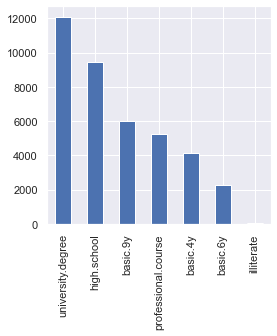

In [91]:
data = data[data.education != "unknown"]

data["education"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["education"] = data.education.replace({"basic.4y":1, "basic.6y":2, "basic.9y":3, "high.school":4, "professional.course":5 , "university.degree": 6, "illiterate": -1})

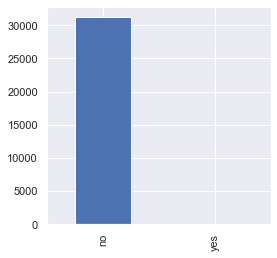

In [92]:
data = data[data.default != "unknown"]


data["default"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["default"] = data.default.replace({"no":0, "yes":1})

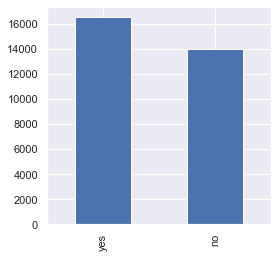

In [93]:
data = data[data.housing != "unknown"]

data["housing"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["housing"] = data.housing.replace({"no":0, "yes":1})

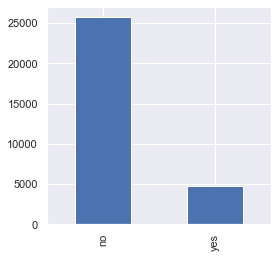

In [94]:
data = data[data.housing != "loan"]

data["loan"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["loan"] = data.loan.replace({"no":0, "yes":1})

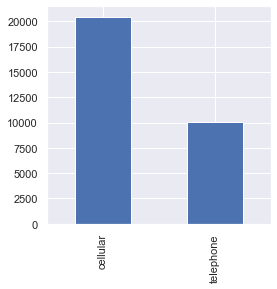

In [95]:
data["contact"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["contact"] = data.contact.replace({"cellular":0, "unknown":1, "telephone":2})

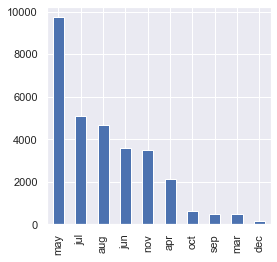

In [96]:
# d = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

data["month"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

# data.month = data.month.map(d);

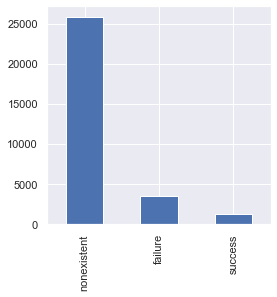

In [97]:
data["poutcome"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["poutcome"] = data.poutcome.replace({"nonexistent":0, "failure":1, "success":2})

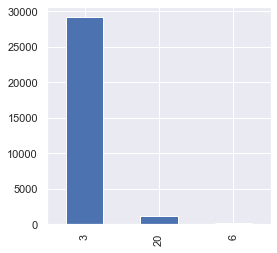

In [98]:
# data["pdays"] = data.pdays.replace({999 : 0})
data["pdays"] = data["pdays"].apply(lambda x: 0 if x==-1 else(20 if 0<x<=10 else(6 if x<=20 else 3)))


data["pdays"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

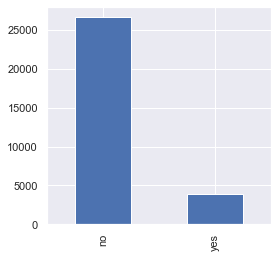

In [99]:
data["y"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["y"] = data.y.replace({"no":0, "yes":1})

Ponieważ kolumna "duration" jest czasem trwania rozmowy telefonicznej ma ona bardzo duży wpływ na wyniki naszego modelu. Np. gdy równy jest 0s, to wynika z tego, że y=0. Jednocześnie poznajemy je po odbyciu rozmowy, czyli po poznaniu y, dlatego zgodnie z zaleceniami twórców danych pozbywamy się tej kolumny.

In [100]:
data.drop([ 'day_of_week', 'contact', 'month', 'duration'], axis=1, inplace = True)

dataAll = data.copy()
class_1_over = data[data['y'] == 0].sample(len(data[data['y'] == 1]))
data = pd.concat([class_1_over, data[data['y'] == 1]], axis=0)
print(data["y"].value_counts())

0    3859
1    3859
Name: y, dtype: int64


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7718 entries, 276 to 41186
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             7718 non-null   int64  
 1   job             7718 non-null   int64  
 2   marital         7718 non-null   int64  
 3   education       7718 non-null   int64  
 4   default         7718 non-null   int64  
 5   housing         7718 non-null   int64  
 6   loan            7718 non-null   int64  
 7   campaign        7718 non-null   int64  
 8   pdays           7718 non-null   int64  
 9   previous        7718 non-null   int64  
 10  poutcome        7718 non-null   int64  
 11  emp.var.rate    7718 non-null   float64
 12  cons.price.idx  7718 non-null   float64
 13  cons.conf.idx   7718 non-null   float64
 14  euribor3m       7718 non-null   float64
 15  nr.employed     7718 non-null   float64
 16  y               7718 non-null   int64  
dtypes: float64(5), int64(12)
memor

# Analiza danych

C:\Users\Pawla\AppData\Local\Temp\ipykernel_46704\872831230.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


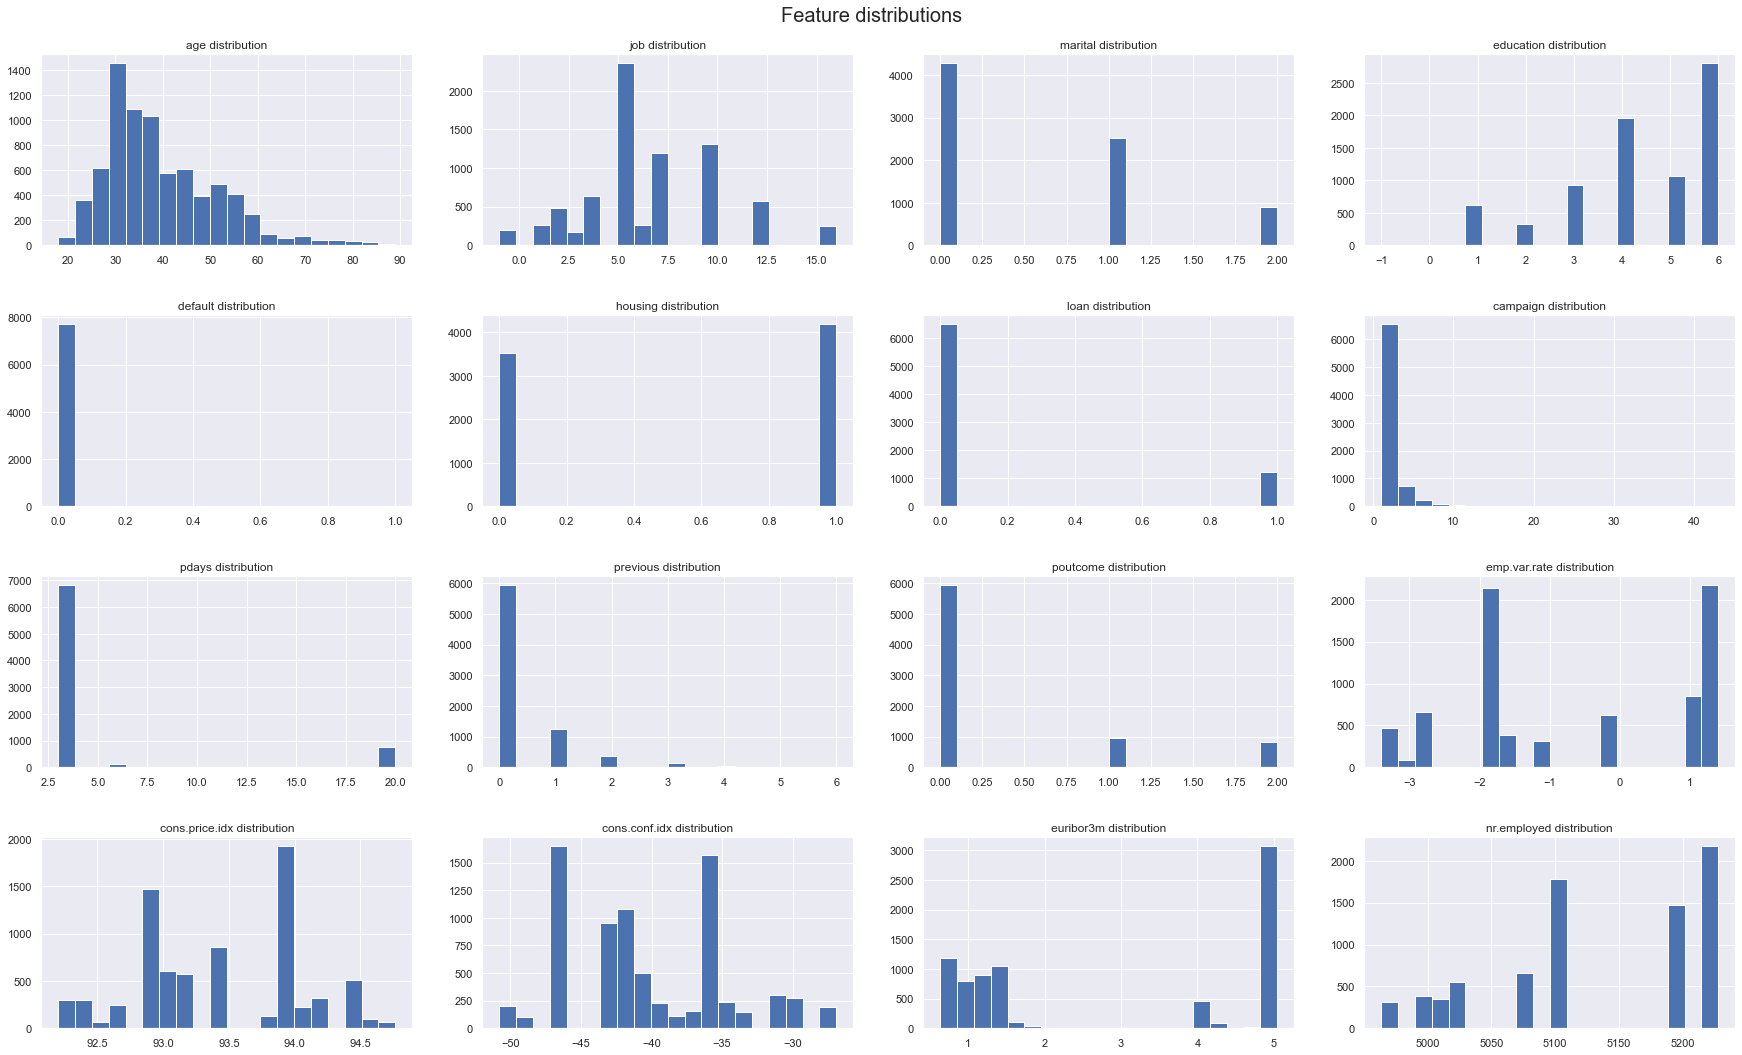

In [105]:
fig, axes = plt.subplots(4, 4, figsize=(25,15))

i = 0
j = 0

for feature in list(data.columns[:-1]):
  data[feature].hist(bins=20,ax=axes[i,j])
  axes[i,j].set_title(feature + " distribution")
  j=j+1
  if j == 4:
    i=i+1
    j=0

fig.tight_layout(pad=3.0)
fig.suptitle("Feature distributions", fontsize=20, verticalalignment='bottom')
fig.show()


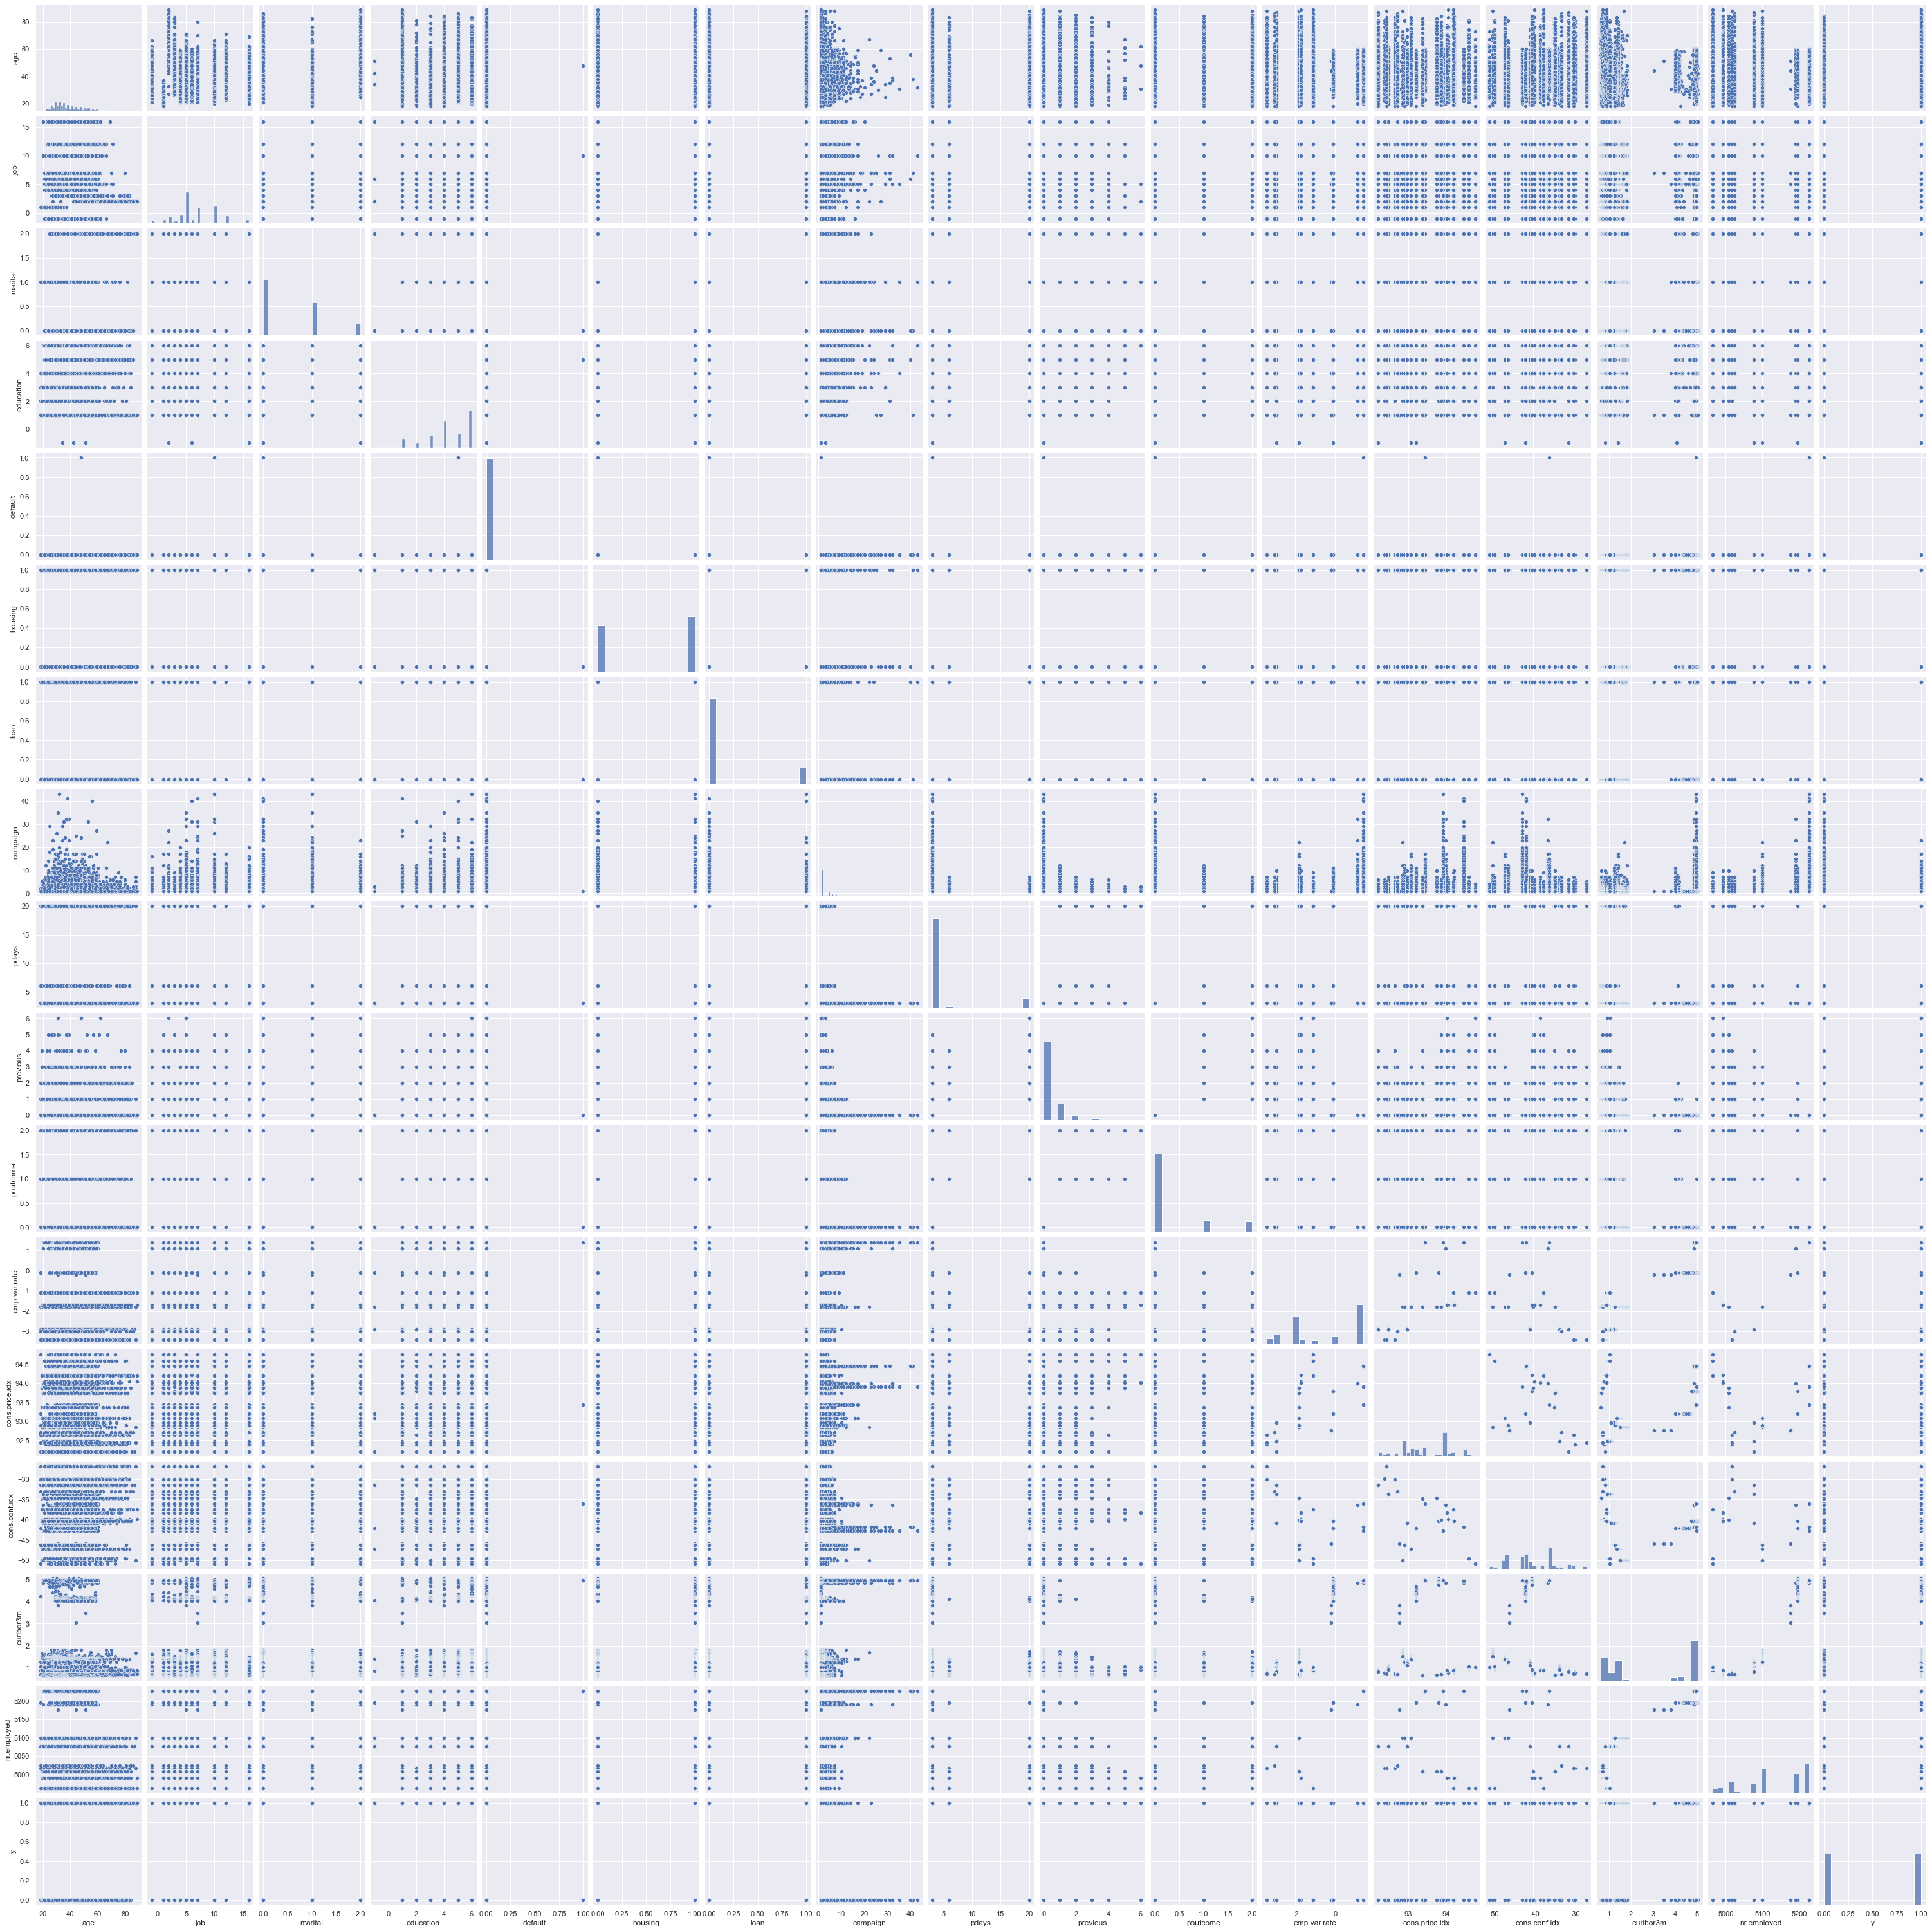

In [106]:
sns.pairplot(data)
plt.show()

In [107]:
corr = data.loc[:, data.columns != "y"].corr()
corr

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.095313,-0.127029,-0.220661,0.008124,0.012231,0.004520,-0.012349,0.088593,0.080359,0.093295,-0.093255,-0.043102,0.134893,-0.090957,-0.118451
job,-0.095313,1.000000,-0.069691,0.176725,0.011343,0.013067,-0.008443,0.015498,-0.093277,-0.087501,-0.091510,0.140577,0.043043,-0.068857,0.152403,0.167263
marital,-0.127029,-0.069691,1.000000,0.077613,-0.009227,0.010717,-0.012082,0.002093,0.003637,0.010137,0.004246,-0.012427,0.010761,-0.045010,-0.021016,-0.019195
education,-0.220661,0.176725,0.077613,1.000000,0.004249,0.025614,-0.002370,-0.002028,0.034198,0.038127,0.034965,-0.039383,-0.047078,0.047439,-0.034217,-0.038840
default,0.008124,0.011343,-0.009227,0.004249,1.000000,-0.012415,-0.004923,-0.006150,-0.003907,-0.005283,-0.005806,0.013359,0.000030,0.008665,0.012838,0.012722
housing,0.012231,0.013067,0.010717,0.025614,-0.012415,1.000000,0.058100,-0.016635,0.003018,0.018093,0.016496,-0.051214,-0.054298,-0.031572,-0.054828,-0.042072
loan,0.004520,-0.008443,-0.012082,-0.002370,-0.004923,0.058100,1.000000,-0.008932,-0.009603,-0.013016,-0.014597,0.024935,0.015216,-0.021364,0.020721,0.020511
campaign,-0.012349,0.015498,0.002093,-0.002028,-0.006150,-0.016635,-0.008932,1.000000,-0.082874,-0.095920,-0.104206,0.191700,0.127954,-0.039155,0.178819,0.182959
pdays,0.088593,-0.093277,0.003637,0.034198,-0.003907,0.003018,-0.009603,-0.082874,1.000000,0.667046,0.830852,-0.308838,-0.031499,0.159399,-0.352387,-0.432894
previous,0.080359,-0.087501,0.010137,0.038127,-0.005283,0.018093,-0.013016,-0.095920,0.667046,1.000000,0.835080,-0.366148,-0.037421,0.080009,-0.434751,-0.510712


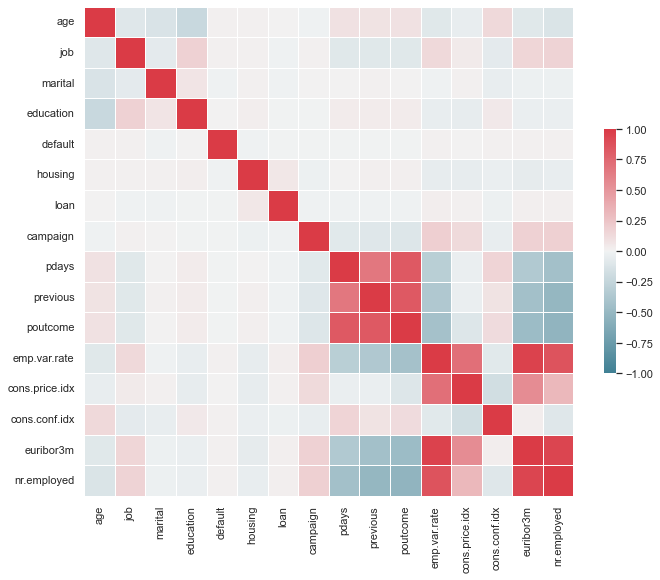

In [108]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

## Modelowanie danych

In [109]:
X = data.loc[:, data.columns != "y"]
y = data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3859, 16) (3859,)
(3859, 16) (3859,)


In [110]:
X_train.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1366,36,7,0,3,0,0,0,5,3,0,0,1.1,93.994,-36.4,4.855,5191.0
25067,35,5,0,4,0,1,0,1,3,0,0,-0.1,93.200,-42.0,4.153,5195.8
37121,42,5,0,6,0,1,0,1,20,1,2,-2.9,92.201,-31.4,0.884,5076.2
33172,35,10,0,3,0,0,0,1,3,0,0,-1.8,92.893,-46.2,1.291,5099.1
37633,41,5,1,4,0,1,0,1,20,1,2,-2.9,92.201,-31.4,0.861,5076.2


In [111]:
y_train.head()

1366     0
25067    0
37121    1
33172    1
37633    1
Name: y, dtype: int64

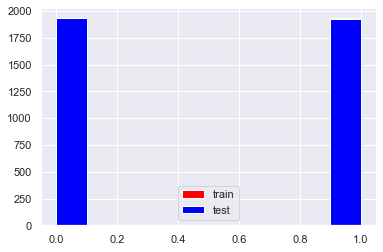

In [112]:
plt.hist(y_train, label="train", color="red")
plt.hist(y_test, label="test", color="blue")
plt.legend()
plt.show()

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

import multiprocessing
n_jobs = multiprocessing.cpu_count()-1


In [114]:
pipeline1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(probability=True))])

param_grid_1 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [ 0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipeline1, param_grid_1, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_1.fit(X_train, y_train)
grid_1.best_params_


{'classifier__C': 100, 'classifier__gamma': 0.001, 'preprocessing': None}

In [115]:
pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly", probability=True, max_iter=10000))])

param_grid_2 = {'preprocessing': [StandardScaler(), None],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__coef0': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'classifier__degree': [1, 2, 3, 4, 5, 6, 7, 8]}
grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_2.fit(X_train, y_train)
grid_2.best_params_


C:\Users\Pawla\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'classifier__C': 10,
 'classifier__coef0': 1,
 'classifier__degree': 2,
 'preprocessing': StandardScaler()}

In [116]:
pipeline_3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_3.fit(X_train, y_train)
grid_3.best_params_


{'classifier__C': 0.1, 'preprocessing': StandardScaler()}

In [117]:
pipeline_4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier(n_jobs=-1))])

param_grid_4 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__p': [1, 10, 20, 100, 1000]
}

grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__p': 1, 'preprocessing': None}

In [118]:
pipeline_5 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_5 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 3, 6, 10, 20],
            'classifier__criterion':['entropy'],
            'classifier__min_samples_leaf' : [10, 12, 15, 17, 20],
            'classifier__min_samples_split' : [20, 22, 25, 30],
            'classifier__random_state' : [0, 1]
}

grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__min_samples_leaf': 17,
 'classifier__min_samples_split': 20,
 'classifier__random_state': 1,
 'preprocessing': StandardScaler()}

In [119]:
pipeline_6 = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_6 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 3, 5, 10, 50, 100],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64, 128],
}

grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__max_leaf_nodes': 64,
 'classifier__n_estimators': 100,
 'preprocessing': None}

In [120]:
pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', BaggingClassifier())])

param_grid_7 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_samples' : [0.05, 0.1, 0.2, 0.5, 0.7, 1]
}

grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_samples': 0.2, 'preprocessing': None}

In [121]:
pipeline_8 = Pipeline([('preprocessing', StandardScaler()), ('classifier', ExtraTreesClassifier(n_jobs=-1))])

param_grid_8 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__max_leaf_nodes': 64,
 'classifier__n_estimators': 100,
 'preprocessing': StandardScaler()}

In [122]:
pipeline_9 = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid_9 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_9 = GridSearchCV(pipeline_9, param_grid_9, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 1,
 'classifier__n_estimators': 50,
 'preprocessing': StandardScaler()}

In [123]:
pipeline_10 = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid_10 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_10 = GridSearchCV(pipeline_10, param_grid_10, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_10.fit(X_train, y_train)
grid_10.best_params_


{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 100,
 'preprocessing': None}

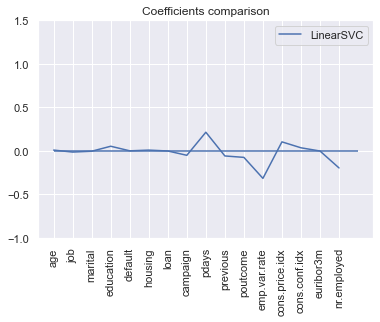

In [124]:
# plt.plot(grid_1.best_estimator_.named_steps["classifier"].coef_.T, label="SVC")
# plt.plot(grid_2.best_estimator_.named_steps["classifier"].coef_.T, label="LinearSVC - kernel poly")
plt.plot(grid_3.best_estimator_.named_steps["classifier"].coef_.T, label="LinearSVC")
plt.xticks(range(X_train.shape[1]), list(X_train.columns), rotation=90)
plt.hlines(0, 0, X_train.shape[1])
plt.ylim(-1, 1.5)
plt.legend()
plt.title("Coefficients comparison")
plt.show()




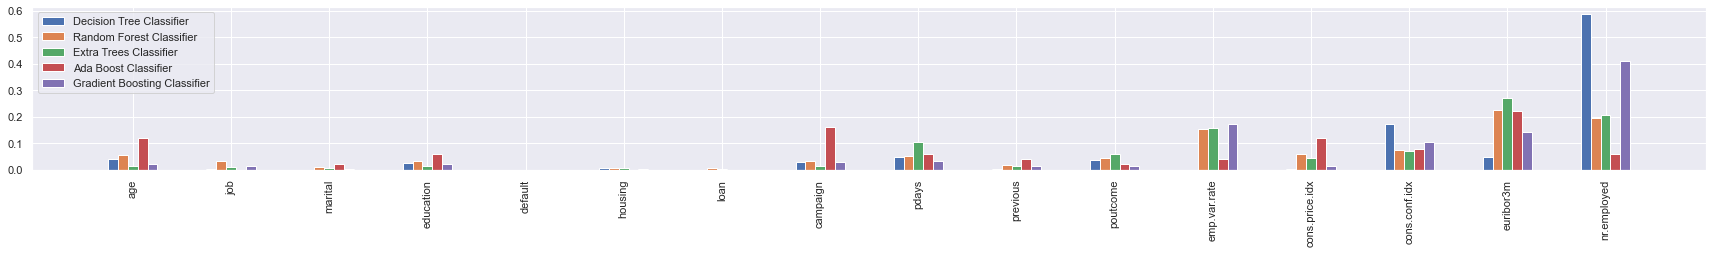

In [125]:


fig, ax = plt.subplots(figsize=(30,3))
objects = list(X_train.columns)
x = np.arange(len(objects))

ax.bar(x-0.2, grid_5.best_estimator_.named_steps["classifier"].feature_importances_, width=0.1, align='center', label="Decision Tree Classifier")
ax.bar(x-0.1, grid_6.best_estimator_.named_steps["classifier"].feature_importances_, width=0.1, align='center', label="Random Forest Classifier")
ax.bar(x, grid_8.best_estimator_.named_steps["classifier"].feature_importances_, width=0.1, align='center', label="Extra Trees Classifier")
ax.bar(x+0.1, grid_9.best_estimator_.named_steps["classifier"].feature_importances_, width=0.1, align='center', label="Ada Boost Classifier")
ax.bar(x+0.2, grid_10.best_estimator_.named_steps["classifier"].feature_importances_, width=0.1, align='center', label="Gradient Boosting Classifier")

plt.xticks(x, objects, rotation=90)
plt.legend()
plt.show()


In [126]:
from sklearn import metrics

models = []
models.append(('SVC', grid_1.best_estimator_))
models.append(('SVC poly', grid_2.best_estimator_))
models.append(('LinearSVC', grid_3.best_estimator_))
models.append(('KNeighborsClassifier', grid_4.best_estimator_))
models.append(('DecisionTreeClassifier', grid_5.best_estimator_))
models.append(('RandomForestClassifier', grid_6.best_estimator_))
models.append(('BaggingClassifier', grid_7.best_estimator_))
models.append(('ExtraTreesClassifier', grid_8.best_estimator_))
models.append(('AdaBoostClassifier', grid_9.best_estimator_))
models.append(('GradientBoostingClassifier', grid_10.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if name == 'LinearSVC':
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

In [127]:
d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVC', 'SVC poly', 'LinearSVC', 'KNeighborsClassifier', 'DecisionTreeClassifier',
                                         'RandomForestClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 'AdaBoostClassifier','GradientBoostingClassifier'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,SVC,0.810863,0.658537,0.726804,0.752786,0.785590
1,SVC poly,0.748606,0.696938,0.721849,0.731796,0.776312
2,LinearSVC,0.741988,0.708874,0.725053,0.731537,0.773565
3,KNeighborsClassifier,0.723596,0.668396,0.694902,0.706919,0.752648
4,DecisionTreeClassifier,0.849084,0.601453,0.704131,0.747603,0.787865
5,RandomForestClassifier,0.822412,0.651271,0.726904,0.755636,0.803769
6,BaggingClassifier,0.769521,0.634146,0.695306,0.722467,0.766771
7,ExtraTreesClassifier,0.822178,0.650234,0.726166,0.755118,0.801003
8,AdaBoostClassifier,0.799361,0.649196,0.716495,0.743457,0.793488
9,GradientBoostingClassifier,0.795818,0.671510,0.728399,0.749935,0.804006


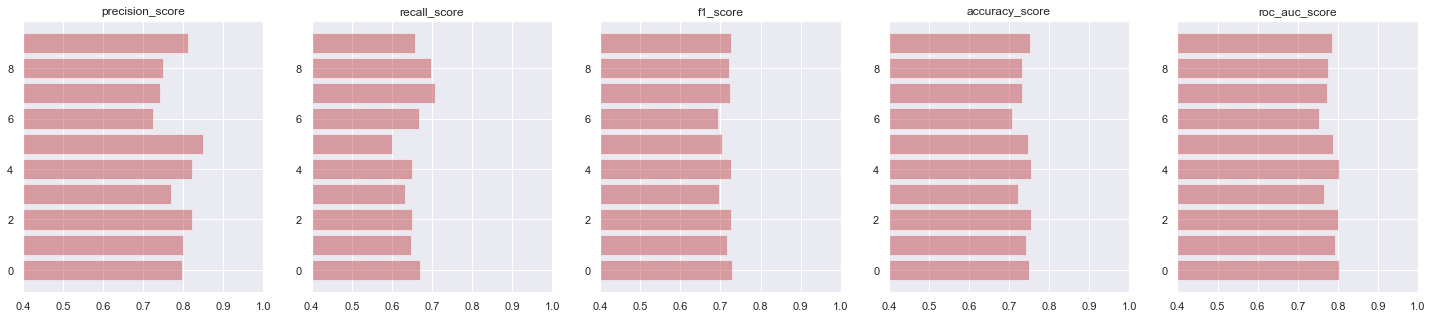

In [128]:
fig, axs = plt.subplots(1, 5, figsize=(25,5), sharey="col")

objects = [name for (name, model) in models]
objects.reverse()
y_pos = np.arange(len(objects))

j = 0

for name in d:
  performance = d[name]
  performance.reverse()
  colors = ['r' if p < 1 else 'b' for p in performance]
  axs[j].barh(y_pos, performance, align='center', alpha=0.5, color=colors)
  axs[j].set_title(name)
  j+=1

for ax in axs:
  ax.set_xlim([0.5, 1])

C:\Users\Pawla\AppData\Local\Temp\ipykernel_46704\855239855.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


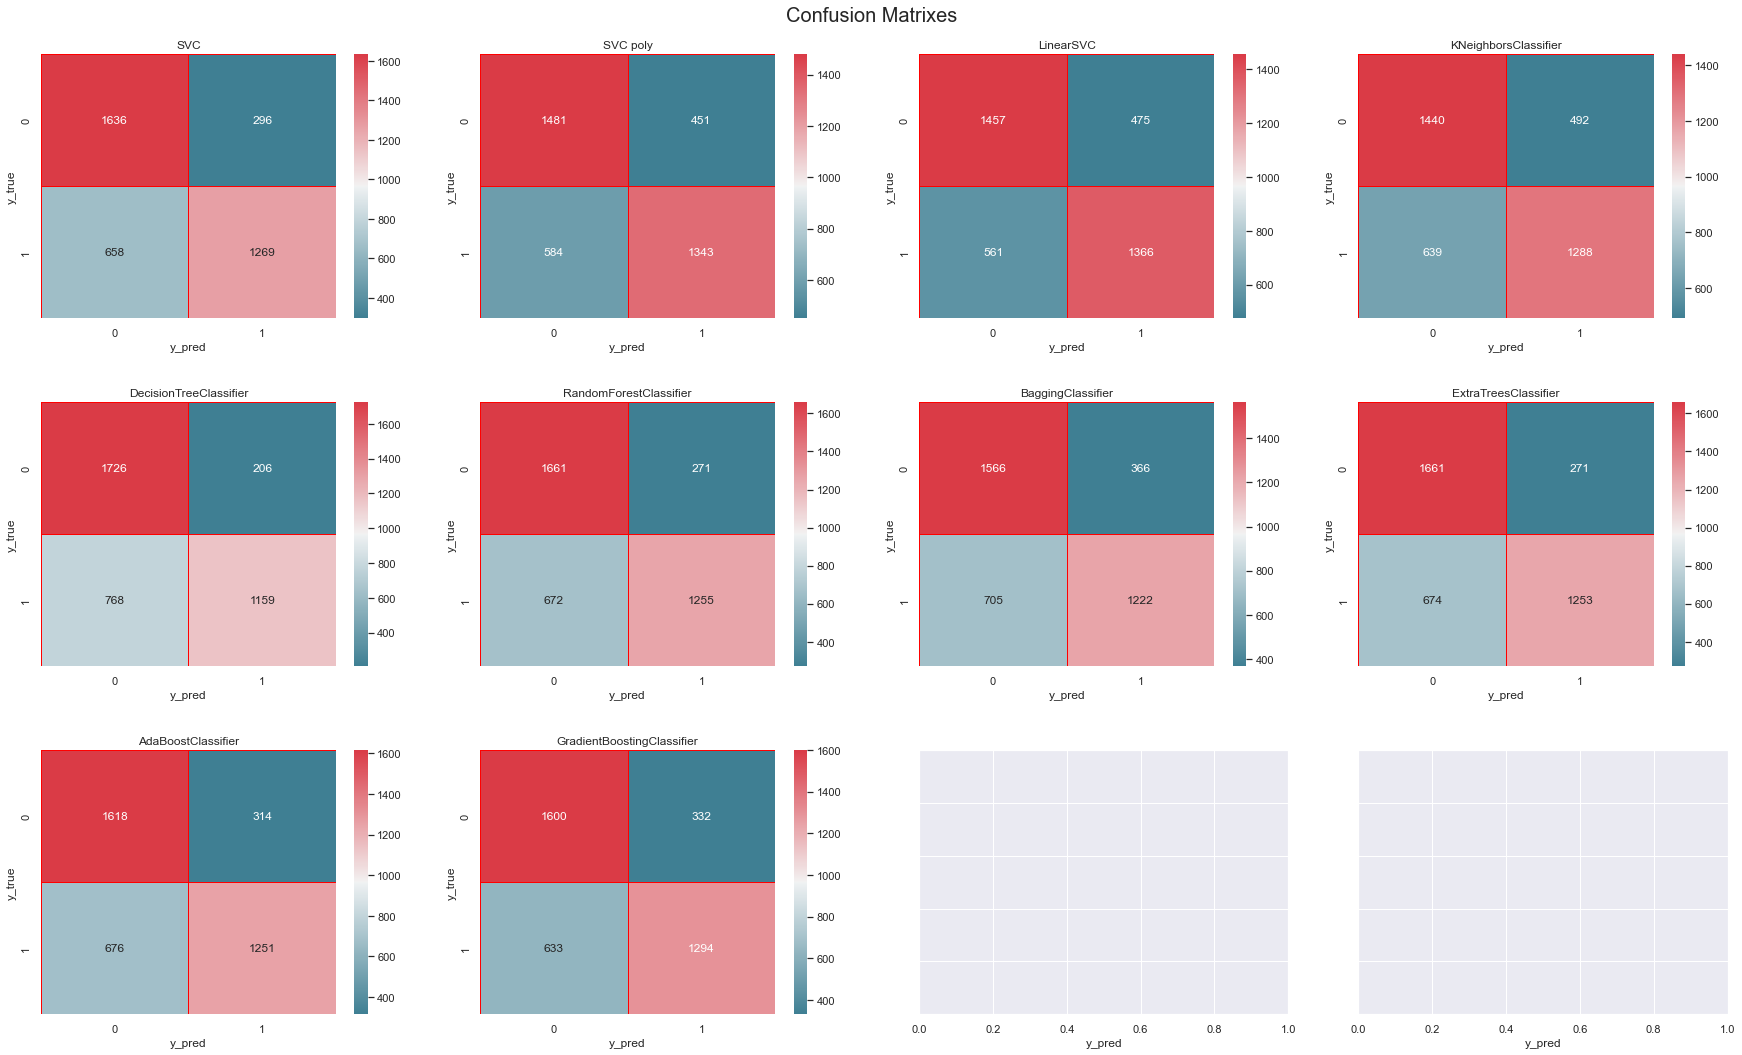

In [129]:
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(3, 4, figsize=(25,15))

i = 0
j = 0

for name, model in models:
  cm = confusion_matrix(y_test, model.predict(X_test))
  sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",cmap=cmap,fmt=".0f",ax=axs[i,j])
  axs[i,j].set_title(name)
  j=j+1
  if j == 4:
    i=i+1
    j=0

for ax in axs.flat:
    ax.set(xlabel='y_pred', ylabel='y_true')
    ax.label_outer()

fig.tight_layout(pad=3.0)
fig.suptitle("Confusion Matrixes", fontsize=20, verticalalignment='bottom')
fig.show()


In [130]:
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [131]:
pipeline_11 = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])

param_grid_11 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__hidden_layer_sizes': [(50, 20,10)],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1],
            'classifier__max_iter': [100, 500, 1000],
            'classifier__batch_size': [8, 16,32],
}

grid_11 = GridSearchCV(pipeline_11, param_grid_11, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_11.fit(X_train, y_train)
grid_11.best_params_


{'classifier__batch_size': 32,
 'classifier__hidden_layer_sizes': (50, 20, 10),
 'classifier__learning_rate_init': 0.1,
 'classifier__max_iter': 1000,
 'preprocessing': StandardScaler()}

In [132]:
# pipeline_12 = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPRegressor())])
#
# param_grid_12 = {
#             'preprocessing': [StandardScaler(), None],
#             'classifier__hidden_layer_sizes': [(50, 20, 10)],
#             'classifier__learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1],
#             'classifier__max_iter': [5000, 50000, 500000],
#             'classifier__batch_size':[10, 20, 30, 40],
# }
#
# grid_12 = GridSearchCV(pipeline_12, param_grid_12, cv=kfold, return_train_score=True, n_jobs=n_jobs)
#
# grid_12.fit(X_train, y_train)
# grid_12.best_params_


{'classifier__batch_size': 40,
 'classifier__hidden_layer_sizes': (50, 20, 10),
 'classifier__learning_rate_init': 0.0001,
 'classifier__max_iter': 50000,
 'preprocessing': StandardScaler()}

In [133]:
models.append(('MLP Classifier', grid_11.best_estimator_))
precision_score.append(metrics.precision_score(y_test , models[-1][1].predict(X_test)))
recall_score.append(metrics.recall_score(y_test , models[-1][1].predict(X_test)))
f1_score.append( metrics.f1_score(y_test , models[-1][1].predict(X_test)))
accuracy_score.append(metrics.accuracy_score(y_test , models[-1][1].predict(X_test)))
roc_auc_score.append(metrics.roc_auc_score(y_test , models[-1][1].predict_proba(X_test)[:,1]))



In [134]:
d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVC', 'SVC poly', 'LinearSVC', 'KNeighborsClassifier', 'DecisionTreeClassifier',
                                         'RandomForestClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 'AdaBoostClassifier','GradientBoostingClassifier', 'MLP Classifier'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,SVC,0.795818,0.671510,0.728399,0.749935,0.804006
1,SVC poly,0.799361,0.649196,0.716495,0.743457,0.793488
2,LinearSVC,0.822178,0.650234,0.726166,0.755118,0.801003
3,KNeighborsClassifier,0.769521,0.634146,0.695306,0.722467,0.766771
4,DecisionTreeClassifier,0.822412,0.651271,0.726904,0.755636,0.803769
5,RandomForestClassifier,0.849084,0.601453,0.704131,0.747603,0.787865
6,BaggingClassifier,0.723596,0.668396,0.694902,0.706919,0.752648
7,ExtraTreesClassifier,0.741988,0.708874,0.725053,0.731537,0.773565
8,AdaBoostClassifier,0.748606,0.696938,0.721849,0.731796,0.776312
9,GradientBoostingClassifier,0.810863,0.658537,0.726804,0.752786,0.785590


In [135]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, SimpleRNN, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from keras.callbacks import History

In [149]:
model = Sequential()

model.add(Dense(units = 6, activation='relu',input_dim = X_train.shape[1]))

# Adding the second hidden layer
model.add(Dense(units = 6, activation='relu'))
# Adding the output layer
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# model_history=classifier.fit(s.fit_transform(x_smote), y_smote,validation_split=0.33, batch_size = 10, epochs = 100)
model.summary()



# model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 6)                 102       
                                                                 
 dense_28 (Dense)            (None, 6)                 42        
                                                                 
 dense_29 (Dense)            (None, 1)                 7         
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [150]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

history = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size = 10, epochs = 100)


Epoch 1/100
386/386 [==============================] - 2s 5ms/step - loss: 0.6473 - accuracy: 0.6183 - val_loss: 0.6165 - val_accuracy: 0.6921
Epoch 2/100
386/386 [==============================] - 2s 5ms/step - loss: 0.6020 - accuracy: 0.7090 - val_loss: 0.5782 - val_accuracy: 0.7245
Epoch 3/100
386/386 [==============================] - 2s 5ms/step - loss: 0.5698 - accuracy: 0.7204 - val_loss: 0.5579 - val_accuracy: 0.7331
Epoch 4/100
386/386 [==============================] - 2s 5ms/step - loss: 0.5564 - accuracy: 0.7276 - val_loss: 0.5533 - val_accuracy: 0.7349
Epoch 5/100
386/386 [==============================] - 2s 5ms/step - loss: 0.5526 - accuracy: 0.7315 - val_loss: 0.5510 - val_accuracy: 0.7359
Epoch 6/100
386/386 [==============================] - 2s 6ms/step - loss: 0.5499 - accuracy: 0.7339 - val_loss: 0.5507 - val_accuracy: 0.7341
Epoch 7/100
386/386 [==============================] - 2s 5ms/step - loss: 0.5489 - accuracy: 0.7352 - val_loss: 0.5497 - val_accuracy: 0.7357

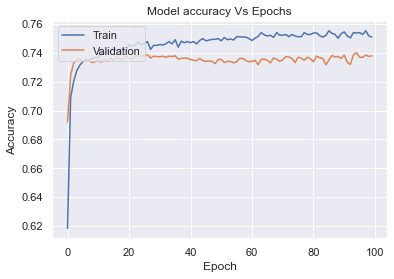

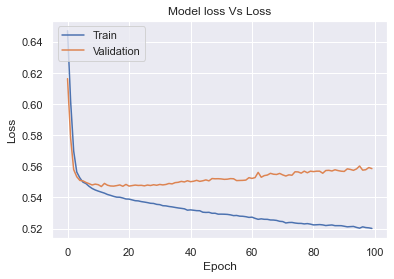

In [151]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy Vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss Vs Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

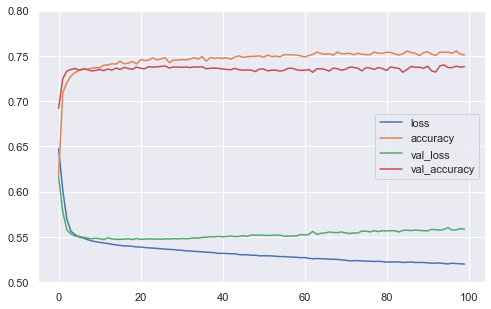

In [154]:


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.5, 0.8)
plt.show()



In [155]:
test_eval = model.evaluate(X_test_scaled, y_test)
test_eval

121/121 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7380


[0.5585790872573853, 0.7380150556564331]

In [156]:
from sklearn import metrics
metrics.accuracy_score(y_true=y_test, y_pred=(model.predict(X_test) > 0.5).astype("int32"))

121/121 [==============================] - 0s 1ms/step


0.4993521637729982